In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
survey_raw_df = pd.read_csv('../data/stack-overflow-developer-survey-2022/survey_results_public.csv', index_col="ResponseId")
survey_raw_df

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,I am a developer by profession,"Employed, full-time",Fully remote,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,Udemy,8,5,...,30-60 minutes a day,Less than 15 minutes a day,Just right,DevOps function;Microservices;Developer portal...,Yes,Yes,Yes,Too long,Easy,NaN
73265,I am a developer by profession,"Employed, full-time",Full in-person,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;Udacity,6,5,...,15-30 minutes a day,60-120 minutes a day,Very long,None of these,No,Yes,Yes,Too long,Easy,NaN
73266,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Programming Games;Stac...,Udemy;Codecademy;Pluralsight;edX,42,33,...,30-60 minutes a day,60-120 minutes a day,Just right,None of these,No,No,No,Appropriate in length,Easy,NaN


In [3]:
schema_raw = pd.read_csv('../data/stack-overflow-developer-survey-2022/survey_results_schema.csv', index_col="qname")["question"]
schema_raw

qname
S0             <div><span style="font-size:19px;"><strong>Hel...
MetaInfo                                       Browser Meta Info
S1             <span style="font-size:22px; font-family: aria...
MainBranch     Which of the following options best describes ...
Employment     Which of the following best describes your cur...
                                     ...                        
Frequency_2    Interacting with people outside of your immedi...
Frequency_3    Encountering knowledge silos (where one indivi...
TrueFalse_1    Are you involved in supporting new hires durin...
TrueFalse_2    Do you use learning resources provided by your...
TrueFalse_3    Does your employer give you time to learn new ...
Name: question, Length: 79, dtype: object

In [4]:
schema_raw["CompTotal"]

'What is your current total compensation (salary, bonuses, and perks, before taxes and deductions)? Please enter a whole number in the box below, without any punctuation.  If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.'

In [5]:
schema_raw["CompFreq"]

'Is that compensation weekly, monthly, or yearly?'

In [6]:
survey_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MainBranch                      73268 non-null  object 
 1   Employment                      71709 non-null  object 
 2   RemoteWork                      58958 non-null  object 
 3   CodingActivities                58899 non-null  object 
 4   EdLevel                         71571 non-null  object 
 5   LearnCode                       71580 non-null  object 
 6   LearnCodeOnline                 50685 non-null  object 
 7   LearnCodeCoursesCert            29389 non-null  object 
 8   YearsCode                       71331 non-null  object 
 9   YearsCodePro                    51833 non-null  object 
 10  DevType                         61302 non-null  object 
 11  OrgSize                         51039 non-null  object 
 12  PurchaseInfluence               

In [7]:
pd.set_option('display.max_columns', 78)
pd.set_option('display.max_rows', 78)

In [8]:
selected_columns = [
    # 인구 통계
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    # 프로그래밍 경험
    'YearsCode',
    'YearsCodePro',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'LearnCodeCoursesCert',
    'ProfessionalTech',
    'SOAccount',
    # 고용 관련 정보
    'Employment',
    'DevType',
    'WorkExp',
]

In [9]:
survey_df = survey_raw_df[selected_columns].copy()
survey_df

,Country,Age,Gender,EdLevel,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,LearnCodeCoursesCert,ProfessionalTech,SOAccount,Employment,DevType,WorkExp
ResponseId,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Canada,NaN,NaN,NaN,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time",NaN,NaN
3,United Kingdom of Great Britain and Northern I...,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,5,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,NaN,NaN,Yes,"Employed, full-time",Data scientist or machine learning specialist;...,NaN
4,Israel,35-44 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,17,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, full-stack",NaN
5,United States of America,25-34 years old,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,3,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, front-end;Developer, full-stack;Dev...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,Nigeria,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,5,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...,Bash/Shell;Go;JavaScript;Python;SQL;TypeScript,Udemy,DevOps function;Microservices;Developer portal...,Yes,"Employed, full-time","Developer, back-end",5.0
73265,United States of America,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,5,Bash/Shell;HTML/CSS;JavaScript;Python;SQL,HTML/CSS;JavaScript;Python,Coursera;Udemy;Udacity,None of these,Not sure/can't remember,"Employed, full-time",Data scientist or machine learning specialist,6.0
73266,United States of America,55-64 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",42,33,HTML/CSS;JavaScript;PHP;Python;SQL,C#;HTML/CSS;JavaScript;PHP;Python;SQL,Udemy;Codecademy;Pluralsight;edX,None of these,Yes,"Employed, full-time","Developer, full-stack;Developer, desktop or en...",42.0


In [10]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 71771 non-null  object 
 1   Age                     70946 non-null  object 
 2   Gender                  70853 non-null  object 
 3   EdLevel                 71571 non-null  object 
 4   YearsCode               71331 non-null  object 
 5   YearsCodePro            51833 non-null  object 
 6   LanguageHaveWorkedWith  70975 non-null  object 
 7   LanguageWantToWorkWith  67027 non-null  object 
 8   LearnCodeCoursesCert    29389 non-null  object 
 9   ProfessionalTech        34906 non-null  object 
 10  SOAccount               71572 non-null  object 
 11  Employment              71709 non-null  object 
 12  DevType                 61302 non-null  object 
 13  WorkExp                 36769 non-null  float64
dtypes: float64(1), object(13)
memory usage

In [11]:
print(schema_raw["YearsCode"])

Including any education, how many years have you been coding in total?


In [12]:
survey_df['YearsCode'].value_counts()

10                    5217
5                     5193
6                     4651
4                     4480
7                     4237
8                     4227
3                     4122
2                     3351
12                    2995
15                    2962
20                    2659
9                     2581
11                    1819
14                    1811
13                    1624
25                    1582
1                     1566
Less than 1 year      1413
16                    1406
30                    1330
22                    1176
18                    1150
17                    1080
40                     777
24                     752
35                     742
23                     644
19                     563
26                     489
27                     485
21                     483
28                     425
32                     371
38                     288
37                     277
34                     241
36                     236
3

#### 연습 문제
해당 컬럼이 난값을 얼마나 갖는지

In [13]:
def count_nan(series):
    return len(series) - series.count()

In [14]:
count_nan(survey_df['YearsCode'])

1937

#### 연습 문제
이얼스코드의 레스댄 원 이어으 ㅣ값은 0으로 변경하고 모덴피프티이어스의 값은 51로 일괄적으로 변경

In [15]:
survey_df["YearsCode"].replace('Less than 1 year', 0, inplace=True)
survey_df["YearsCode"].replace('More than 50 years', 51, inplace=True)
survey_df["YearsCode"] = survey_df["YearsCode"].astype('f')
survey_df["YearsCode"].value_counts()

10.0    5217
5.0     5193
6.0     4651
4.0     4480
7.0     4237
8.0     4227
3.0     4122
2.0     3351
12.0    2995
15.0    2962
20.0    2659
9.0     2581
11.0    1819
14.0    1811
13.0    1624
25.0    1582
1.0     1566
0.0     1413
16.0    1406
30.0    1330
22.0    1176
18.0    1150
17.0    1080
40.0     777
24.0     752
35.0     742
23.0     644
19.0     563
26.0     489
27.0     485
21.0     483
28.0     425
32.0     371
38.0     288
37.0     277
34.0     241
36.0     236
33.0     229
42.0     216
29.0     208
51.0     172
31.0     170
45.0     167
39.0     159
41.0     143
43.0     115
44.0     104
50.0      68
46.0      57
47.0      42
48.0      41
49.0      35
Name: YearsCode, dtype: int64

In [16]:
# survey_df["YearsCode"] = survey_df["YearsCode"].astype('f')
survey_df["YearsCode"]

ResponseId
1         NaN
2         NaN
3        14.0
4        20.0
5         8.0
         ... 
73264     8.0
73265     6.0
73266    42.0
73267    50.0
73268    16.0
Name: YearsCode, Length: 73268, dtype: float32

In [17]:
print(schema_raw['YearsCodePro'])

NOT including education, how many years have you coded professionally (as a part of your work)?


In [18]:
count_nan(survey_df['YearsCodePro'])

21435

In [19]:
survey_df['YearsCodePro'].value_counts()

3                     4261
5                     4057
2                     3945
4                     3884
10                    3333
6                     3184
7                     2760
8                     2646
1                     2644
Less than 1 year      1972
15                    1822
12                    1711
9                     1583
20                    1472
11                    1369
14                    1048
22                     933
16                     921
13                     914
25                     877
18                     787
17                     723
30                     568
23                     463
24                     454
21                     429
19                     380
26                     320
27                     286
35                     266
28                     254
32                     223
40                     175
29                     126
33                     122
31                     121
34                     113
3

In [20]:
survey_df["YearsCodePro"].replace('Less than 1 year', 0, inplace=True)
survey_df["YearsCodePro"].replace('More than 50 years', 51, inplace=True)
survey_df["YearsCodePro"] = survey_df["YearsCodePro"].astype('f')
survey_df["YearsCodePro"].value_counts()

3.0     4261
5.0     4057
2.0     3945
4.0     3884
10.0    3333
6.0     3184
7.0     2760
8.0     2646
1.0     2644
0.0     1972
15.0    1822
12.0    1711
9.0     1583
20.0    1472
11.0    1369
14.0    1048
22.0     933
16.0     921
13.0     914
25.0     877
18.0     787
17.0     723
30.0     568
23.0     463
24.0     454
21.0     429
19.0     380
26.0     320
27.0     286
35.0     266
28.0     254
32.0     223
40.0     175
29.0     126
33.0     122
31.0     121
34.0     113
36.0     111
37.0     100
38.0      96
42.0      67
45.0      52
39.0      51
41.0      42
51.0      41
43.0      31
44.0      26
46.0      19
48.0      18
50.0      14
47.0      10
49.0       9
Name: YearsCodePro, dtype: int64

In [21]:
survey_df.describe()

,YearsCode,YearsCodePro,WorkExp
count,71331.000000,51833.000000,36769.000000
mean,12.251307,9.910270,10.242378
std,9.950397,8.712011,8.706850
min,0.000000,0.000000,0.000000
25%,5.000000,4.000000,4.000000
50%,9.000000,7.000000,8.000000
75%,16.000000,14.000000,15.000000
max,51.000000,51.000000,50.000000


### pandas.to_numeric

### return previous part

In [22]:
schema_raw['Gender']

'Which of the following describe you, if any? Please check all that apply.'

In [23]:
survey_df['Gender'].value_counts()

Man                                                                                   64607
Woman                                                                                  3399
Prefer not to say                                                                      1172
Non-binary, genderqueer, or gender non-conforming                                       704
Or, in your own words:                                                                  279
Man;Non-binary, genderqueer, or gender non-conforming                                   235
Man;Or, in your own words:                                                              171
Woman;Non-binary, genderqueer, or gender non-conforming                                 160
Man;Woman;Non-binary, genderqueer, or gender non-conforming                              31
Man;Woman                                                                                24
Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conformi

### pandas.Series.str.contains()

### pandas.DataFrame.where() 
첫 인수로 받은 Bool 타입 Series에서 False 인 값들을 두번째 인수로 바꿔주는 메서드

In [24]:
survey_df.where(~(survey_df['Gender'].str.contains(';', na=False)), np.nan, inplace=True) # ~ : 비트연산자로 반전시키는 역할 (like not). 여기서 True를 False로, False를 True로 반전시켜준다. 

In [25]:
survey_df['Gender'].value_counts()

Man                                                  64607
Woman                                                 3399
Prefer not to say                                     1172
Non-binary, genderqueer, or gender non-conforming      704
Or, in your own words:                                 279
Name: Gender, dtype: int64

In [53]:
# Control graph style

%matplotlib inline
sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = (9, 5)
mpl.rcParams['figure.facecolor'] = '#00000000'

In [54]:
# Control font process
import matplotlib.font_manager as font_manager
import matplotlib as mpl
# Add every font at the specified location
font_dir = ['C:/Users/PlayData/AppData/Local/Microsoft/Windows/Fonts']
for font in font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    font_manager.fontManager.addfont(font)
# Set font family globally
mpl.rcParams['font.family'] = '????'
print(mpl.rcParams['font.family'])

????
Dokdo
EF_????
NanumGothic
Dongle
['????']


In [28]:
# 마이너스 기호를 ASCII로 합니다.
mpl.rcParams['axes.unicode_minus'] = False

In [29]:
schema_raw['Country']

'Where do you live? <span style="font-weight: bolder;">*</span>'

In [30]:
survey_df['Country'].unique()

array([nan, 'Canada',
       'United Kingdom of Great Britain and Northern Ireland', 'Israel',
       'United States of America', 'Germany', 'India', 'Netherlands',
       'Croatia', 'Australia', 'Russian Federation', 'Czech Republic',
       'Austria', 'Serbia', 'Italy', 'Ireland', 'Poland', 'Slovenia',
       'Iraq', 'Sweden', 'Madagascar', 'Norway', 'Taiwan',
       'Hong Kong (S.A.R.)', 'Mexico', 'France', 'Brazil', 'Lithuania',
       'Uruguay', 'Denmark', 'Spain', 'Egypt', 'Turkey', 'South Africa',
       'Ukraine', 'Finland', 'Romania', 'Portugal', 'Singapore', 'Oman',
       'Belgium', 'Chile', 'Bulgaria', 'Latvia', 'Philippines', 'Greece',
       'Belarus', 'Saudi Arabia', 'Kenya', 'Switzerland', 'Iceland',
       'Viet Nam', 'Thailand', 'China', 'Montenegro', 'Slovakia', 'Japan',
       'Luxembourg', 'Turkmenistan', 'Argentina', 'Hungary', 'Tunisia',
       'Bangladesh', 'Maldives', 'Dominican Republic', 'Jordan',
       'Pakistan', 'Nepal', 'Iran, Islamic Republic of...', 'I

In [31]:
survey_df['Country'].nunique() # nunique()메서드: 해당 데이터에서 유일한 값의 개수를 확인합니다. NaN값은 세지 않습니다.

180

#### 연습 문제
상위 15개 국가를 구현해보세요

In [32]:
survey_df['Country'].value_counts().head(15)

United States of America                                13321
India                                                    6618
Germany                                                  5342
United Kingdom of Great Britain and Northern Ireland     4132
Canada                                                   2459
France                                                   2306
Brazil                                                   2088
Poland                                                   1719
Netherlands                                              1539
Spain                                                    1511
Italy                                                    1504
Australia                                                1449
Russian Federation                                       1215
Turkey                                                   1014
Sweden                                                   1008
Name: Country, dtype: int64

#### 연습 문제
위 문제에서 구한 데이터들로 다음의 차트를 작성해보세요.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

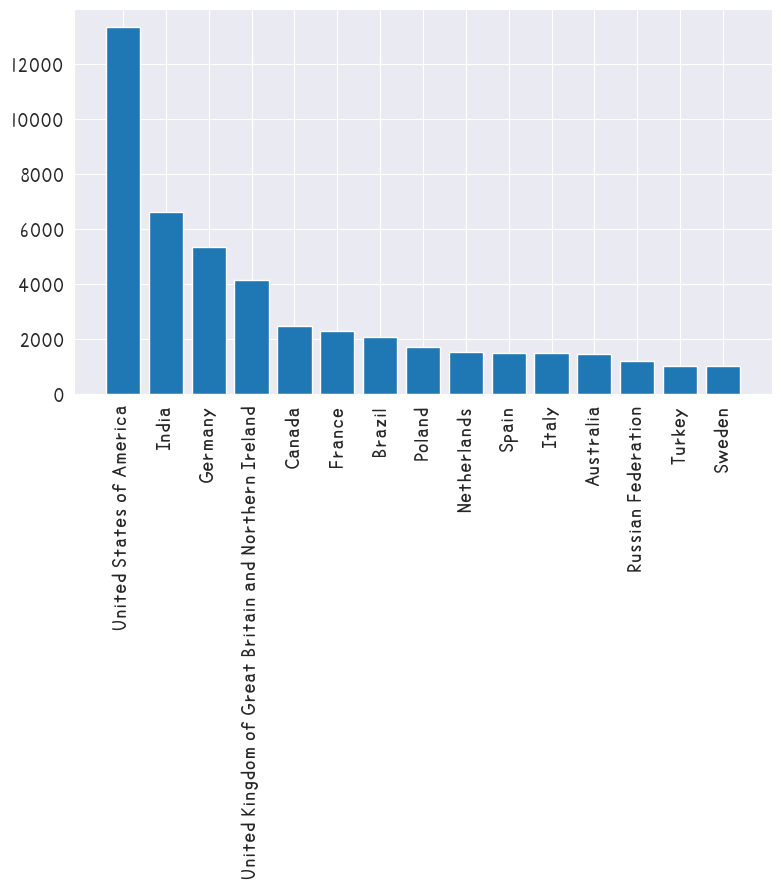

In [38]:
top15_survey_by_area = survey_df['Country'].value_counts().head(15)
plt.bar(top15_survey_by_area.index, top15_survey_by_area.values)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'United States of America'),
  Text(1, 0, 'India'),
  Text(2, 0, 'Germany'),
  Text(3, 0, 'United Kingdom of Great Britain and Northern Ireland'),
  Text(4, 0, 'Canada'),
  Text(5, 0, 'France'),
  Text(6, 0, 'Brazil'),
  Text(7, 0, 'Poland'),
  Text(8, 0, 'Netherlands'),
  Text(9, 0, 'Spain'),
  Text(10, 0, 'Italy'),
  Text(11, 0, 'Australia'),
  Text(12, 0, 'Russian Federation'),
  Text(13, 0, 'Turkey'),
  Text(14, 0, 'Sweden')])

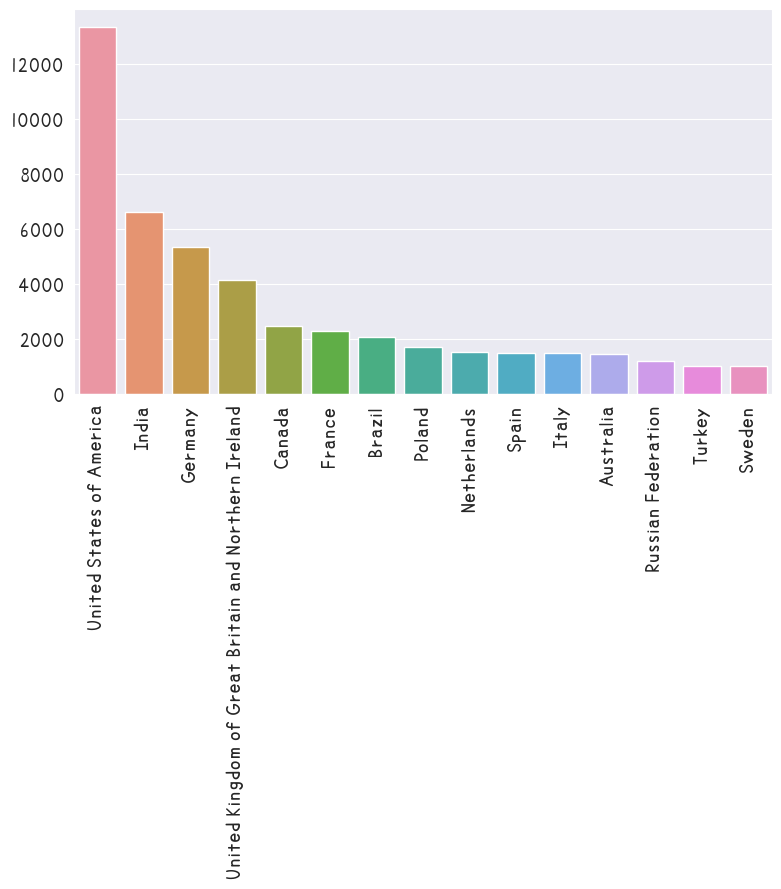

In [45]:
sns.barplot(x=top15_survey_by_area.index, y=top15_survey_by_area.values)
plt.xticks(rotation=90)

In [44]:
top15_survey_by_area

United States of America                                13321
India                                                    6618
Germany                                                  5342
United Kingdom of Great Britain and Northern Ireland     4132
Canada                                                   2459
France                                                   2306
Brazil                                                   2088
Poland                                                   1719
Netherlands                                              1539
Spain                                                    1511
Italy                                                    1504
Australia                                                1449
Russian Federation                                       1215
Turkey                                                   1014
Sweden                                                   1008
Name: Country, dtype: int64

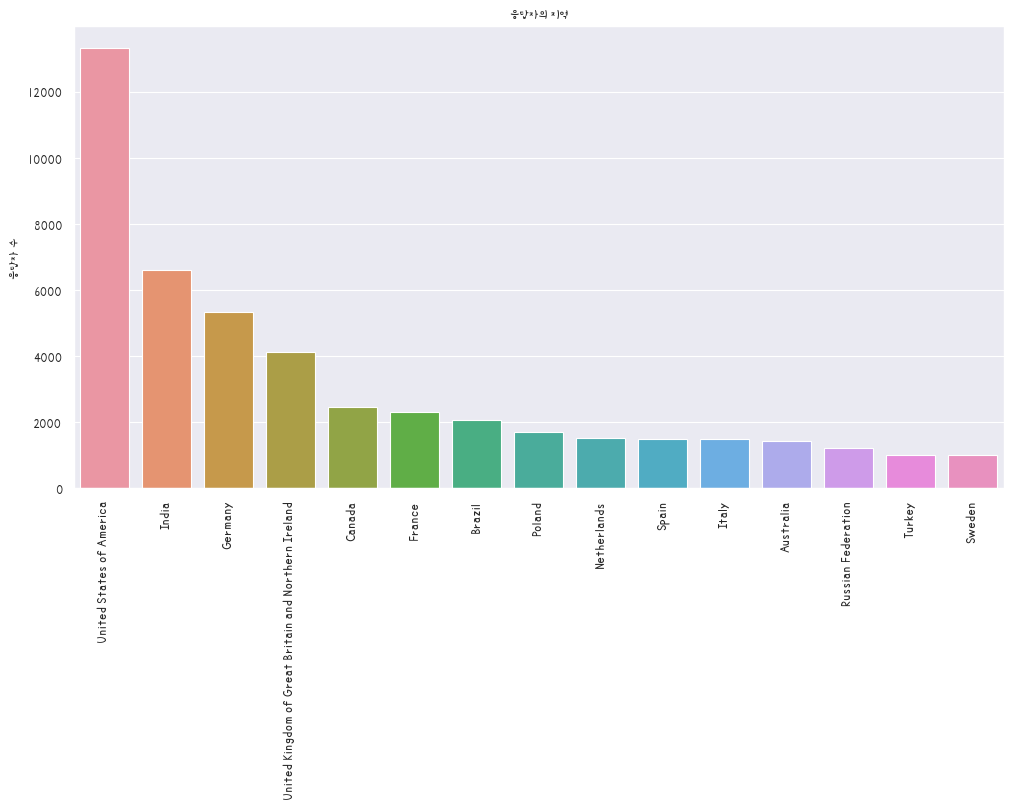

In [55]:
plt.figure(figsize=(12, 6))
plt.title('응답자의 지역')
plt.xticks(rotation=90)
sns.barplot(x=top15_survey_by_area.index, y=top15_survey_by_area)
plt.ylabel('응답자 수')
plt.show()

In [56]:
count_nan(survey_df['Age'])

3011

In [58]:
age_counts = survey_df['Age'].value_counts()
age_counts

25-34 years old       27878
18-24 years old       16455
35-44 years old       13866
45-54 years old        5250
Under 18 years old     3775
55-64 years old        1974
65 years or older       547
Prefer not to say       512
Name: Age, dtype: int64

In [59]:
survey_df['Age'].unique()

array([nan, '25-34 years old', '35-44 years old', 'Under 18 years old',
       '18-24 years old', '45-54 years old', '55-64 years old',
       '65 years or older', 'Prefer not to say'], dtype=object)

In [60]:
survey_df['Age'].nunique()

8

#### 연습 문제
연령의 분포가 한눈에 들어오도록 그래프로 출력해보세요.

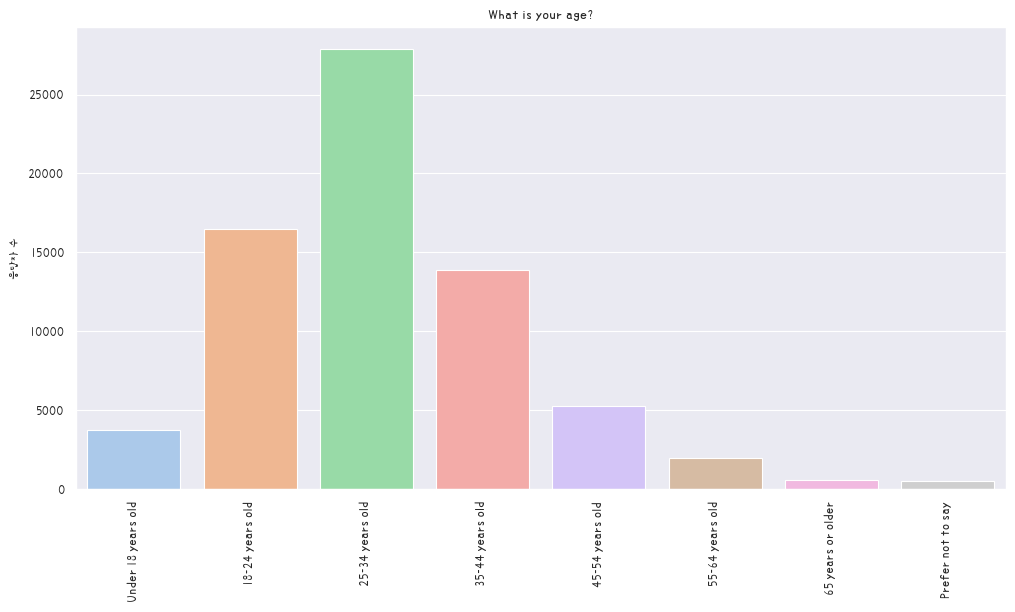

In [61]:
plt.figure(figsize=(12, 6))
plt.title(schema_raw['Age'])
plt.xticks(rotation=90)
sns.barplot(x=age_counts.index, y=age_counts, order=['Under 18 years old', '18-24 years old', '25-34 years old', 
                                                     '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older',
                                                     'Prefer not to say']
           )
plt.ylabel('응답자 수')
plt.show()

#### 연습 문제
앞의 Gender 데이터를 활용해서 파이 플롯을 작성해보세요.

In [65]:
survey_gender_pie_val = survey_df['Gender'].value_counts()

In [71]:
# matplotlib에서 적용할 수 있는 style 목록 조회
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [70]:
plt.style.use('Solarize_Light2')

In [ ]:
# axes만 색상 변경하는 법
# plt.style.use("default") 로 변경해줘야 함
mpl.rcParams["axes.facecolor"] = "white"

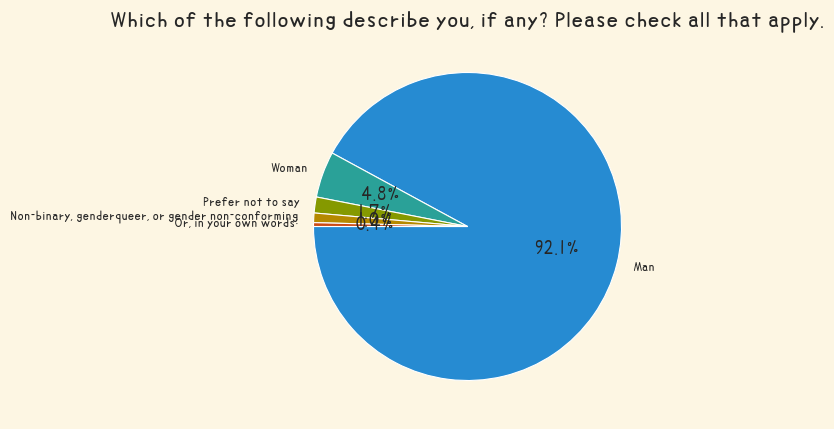

In [76]:
plt.title(schema_raw['Gender'])
plt.pie(survey_gender_pie_val, labels=survey_gender_pie_val.index, autopct='%1.1f%%', startangle=180)
plt.show()

#### 연습 문제
교육 수준 데이터를 활용해서 그래프를 작성해보세요.

In [87]:
survey_edu_ratio = survey_df["EdLevel"].value_counts(normalize=True)
survey_edu_ratio

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          0.423962
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       0.217187
Some college/university study without earning a degree                                0.129714
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    0.109609
Associate degree (A.A., A.S., etc.)                                                   0.031335
Other doctoral degree (Ph.D., Ed.D., etc.)                                            0.030362
Primary/elementary school                                                             0.024930
Something else                                                                        0.017241
Professional degree (JD, MD, etc.)                                                    0.015660
Name: EdLevel, dtype: float64

<AxesSubplot:xlabel='count', ylabel='EdLevel'>

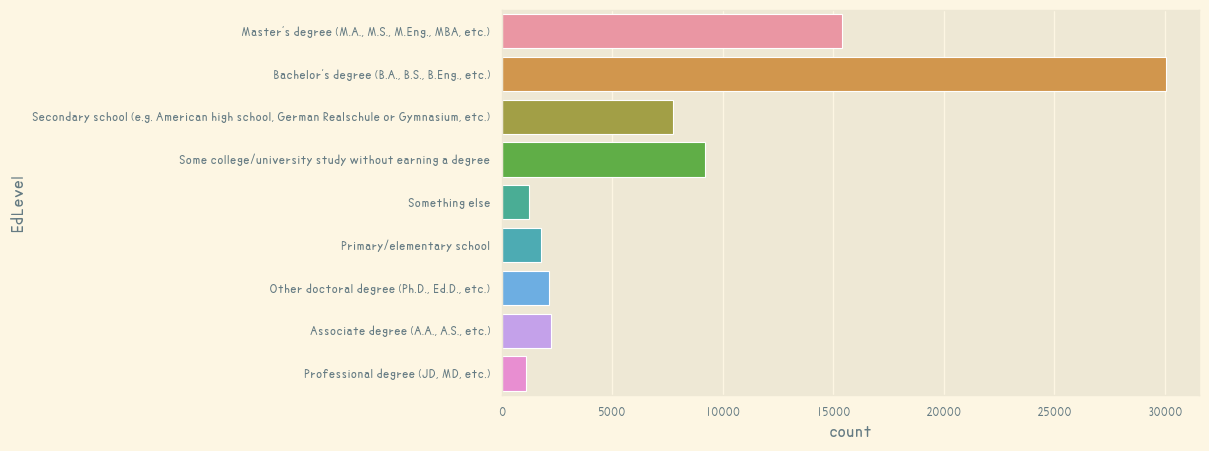

In [92]:
sns.countplot(y=survey_df["EdLevel"])

In [94]:
survey_df["EdLevel"]

ResponseId
1                                                    NaN
2                                                    NaN
3        Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
4           Bachelor’s degree (B.A., B.S., B.Eng., etc.)
5           Bachelor’s degree (B.A., B.S., B.Eng., etc.)
                              ...                       
73264       Bachelor’s degree (B.A., B.S., B.Eng., etc.)
73265    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
73266       Bachelor’s degree (B.A., B.S., B.Eng., etc.)
73267       Bachelor’s degree (B.A., B.S., B.Eng., etc.)
73268       Bachelor’s degree (B.A., B.S., B.Eng., etc.)
Name: EdLevel, Length: 73268, dtype: object

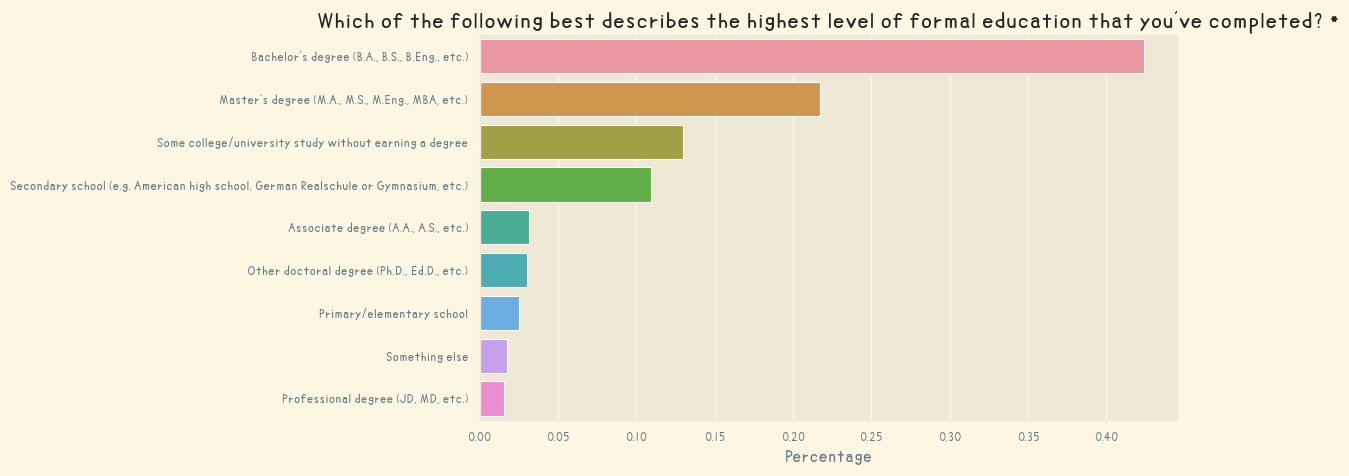

In [101]:
sns.barplot(y=survey_edu_ratio.index, x=survey_edu_ratio)
plt.xlabel("Percentage")
plt.title(schema_raw["EdLevel"])
plt.show()

In [105]:
survey_df['Employment'].value_counts()

Employed, full-time                                                                                               42644
Student, full-time                                                                                                 6663
Independent contractor, freelancer, or self-employed                                                               4941
Employed, full-time;Independent contractor, freelancer, or self-employed                                           3456
Not employed, but looking for work                                                                                 1810
                                                                                                                  ...  
Student, part-time;Independent contractor, freelancer, or self-employed;Retired                                       1
Employed, full-time;Student, full-time;Student, part-time;Independent contractor, freelancer, or self-employed        1
Employed, part-time;Not employed, and no

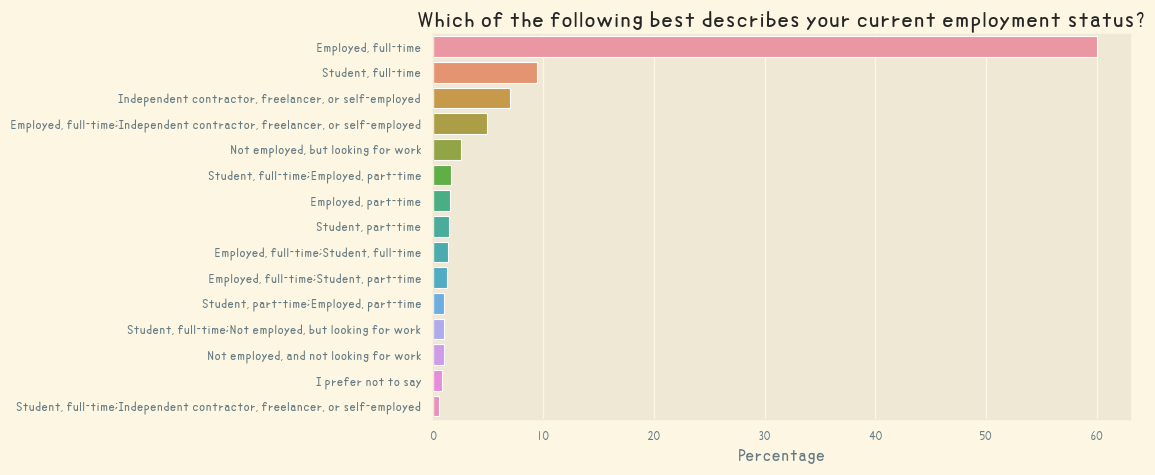

In [109]:
survey_employ_ratio = survey_df['Employment'].value_counts(True).head(15)*100
sns.barplot(x=survey_employ_ratio, y=survey_employ_ratio.index)
plt.title(schema_raw["Employment"])
plt.xlabel("Percentage")
plt.show()